dbscan (density-based spatial clustering of applications with noise) : 밀도 기반 클러스터링

In [8]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [10]:
iris = load_iris()

iris_feature_names = list(map(lambda x: "_".join(x.split(" ")[:-1]), iris.feature_names))
iris_df = pd.DataFrame(iris.data, columns=iris_feature_names)

iris_df["target"] = iris.target
iris_df

sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]

In [ ]:
# eps : epsilon 거리 (해당 거리 안에 min_samples가 있으면 핵심 포인트로 선정)
# min_samples  : 핵심 포인트가 되기 위한 최소한의 데이터 갯수(충족되어야 하는 데이터의 최소의 갯수)
model = DBSCAN()

In [12]:
predict = model.fit_predict(iris.data)
iris_df["predict"] = predict
iris_df

sepal_length  sepal_width  petal_length  petal_width  target  predict
0             5.1          3.5           1.4          0.2       0        0
1             4.9          3.0           1.4          0.2       0        0
2             4.7          3.2           1.3          0.2       0        0
3             4.6          3.1           1.5          0.2       0        0
4             5.0          3.6           1.4          0.2       0        0
..            ...          ...           ...          ...     ...      ...
145           6.7          3.0           5.2          2.3       2        1
146           6.3          2.5           5.0          1.9       2        1
147           6.5          3.0           5.2          2.0       2        1
148           6.2          3.4           5.4          2.3       2        1
149           5.9          3.0           5.1          1.8       2        1

[150 rows x 6 columns]

In [ ]:
# -1 :  noise (outlier : 이상치)
# 0 : 49개와 1 : 84개 로 인지하고 있다.
iris_df.groupby(["target", "predict"])["sepal_width"].count()

target  predict
0       -1          1
         0         49
1       -1          6
         1         44
2       -1         10
         1         40
Name: sepal_width, dtype: int64

In [14]:
# 2차원으로 시각화 해보자
iris_pca = PCA(n_components=2).fit_transform(iris.data)
iris_df["pca_1"] = iris_pca[:,0]
iris_df["pca_2"] = iris_pca[:,1]
iris_df

sepal_length  sepal_width  petal_length  ...  predict     pca_1     pca_2
0             5.1          3.5           1.4  ...        0 -2.684126  0.319397
1             4.9          3.0           1.4  ...        0 -2.714142 -0.177001
2             4.7          3.2           1.3  ...        0 -2.888991 -0.144949
3             4.6          3.1           1.5  ...        0 -2.745343 -0.318299
4             5.0          3.6           1.4  ...        0 -2.728717  0.326755
..            ...          ...           ...  ...      ...       ...       ...
145           6.7          3.0           5.2  ...        1  1.944110  0.187532
146           6.3          2.5           5.0  ...        1  1.527167 -0.375317
147           6.5          3.0           5.2  ...        1  1.764346  0.078859
148           6.2          3.4           5.4  ...        1  1.900942  0.116628
149           5.9          3.0           5.1  ...        1  1.390189 -0.282661

[150 rows x 8 columns]

<Axes: xlabel='pca_1', ylabel='pca_2'>

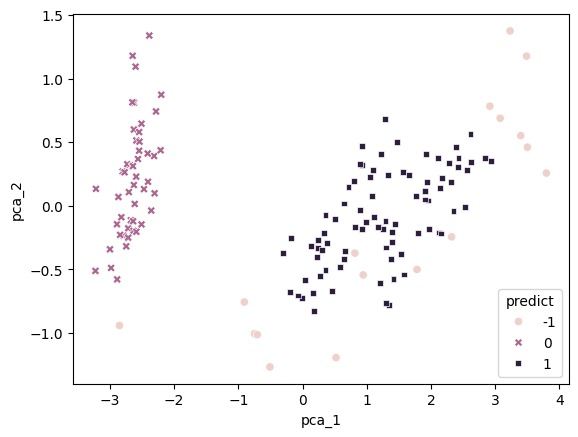

In [15]:
sns.scatterplot(iris_df, x="pca_1", y="pca_2", hue="predict", style="predict")

eps (epsilon) 거리를 정의

- core point :  핵심 포인트. min_samples 이상의 데이터를 가질 때, 군집의 중심으로 판별 -> 영역 확장
- border point :  경계 포인트. min_samples 미만의 데이터를 가질때, 군집 내 데이터로 판별 -> 영역 확장 X
- noise point : 이상치(outlier) -> 군집에 포함하지 않음